In [1]:
#任务1：图属性与图构造
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 两列，分别为节点id，节点类别
group = pd.read_csv('http://mirror.coggle.club/dataset/graph-wiki/group.txt.zip', sep='\t', header=None)

# 两列，分别为出发节点id，目的节点id
graph = pd.read_csv('http://mirror.coggle.club/dataset/graph-wiki/graph.txt.zip', sep='\t', header=None)

In [67]:
g = nx.DiGraph()

In [68]:
g.add_edges_from(graph.values[:])

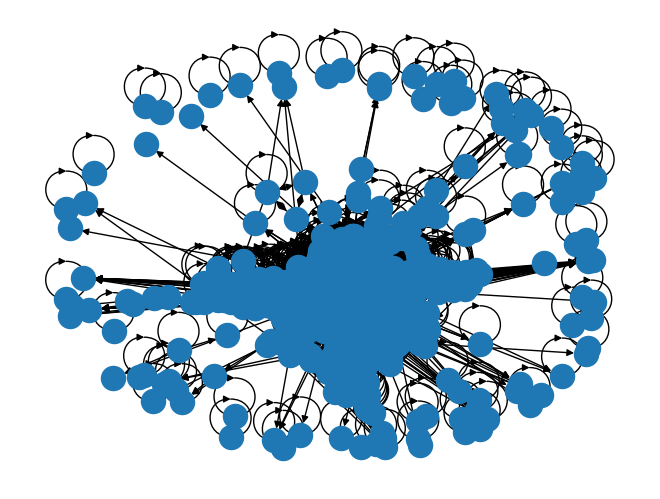

In [69]:
nx.draw_spring(g)

In [70]:
# 任务2：图查询与遍历
# 边个数 节点个数
g.number_of_edges(), g.number_of_nodes()

(16523, 2405)

In [71]:
# 度均值
np.mean([x[1] for x in list(g.degree())])

13.740540540540541

In [72]:
# 存在指向自身节点的个数
nx.number_of_selfloops(g)

1165

In [88]:
# 对节点1397的深度5内进行深度和广度遍历
dfs_1397 = nx.dfs_tree(g, 1397, depth_limit=5).nodes()

In [89]:
bfs_1397 = nx.bfs_tree(g, 1397,depth_limit=5).nodes()

In [90]:
# 节点1573与节点1397之间的路径
list(nx.connectivity.node_disjoint_paths(g, 1573, 1397))

[[1573, 2337, 489, 708, 1525, 1397],
 [1573, 280, 696, 1610, 1445, 1397],
 [1573, 445, 2395, 750, 1397],
 [1573, 933, 1455, 1401, 1412, 1397]]

In [97]:
# 任务3：节点中心性与应用
# 步骤1：筛选度最大的Top10个节点，并对节点深度1以内的节点进行可视化；
g_degree = pd.DataFrame(g.degree()).sort_values(by=1,ascending=False)

In [99]:
g_degree = g_degree.iloc[:10]

In [100]:
g_degree

,0,1
8,393,281
5,489,273
9,445,236
24,1412,135
180,1467,127
32,1465,119
28,235,118
14,708,118
190,624,114
309,526,110


In [101]:
selected_nodes = []
for node in g_degree[0].values:
    selected_nodes += list(nx.dfs_tree(g,node,depth_limit=1).nodes())

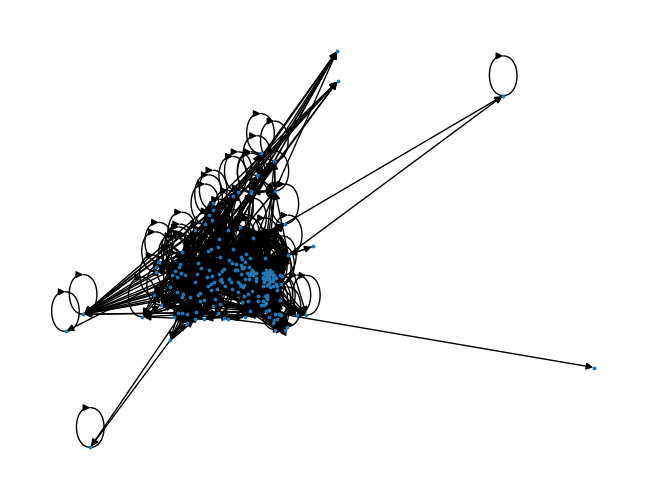

In [104]:
nx.draw_spring(g.subgraph(selected_nodes), node_size=3)

In [106]:
# 步骤2：使用PageRank筛选Top10个节点，并对节点深度1以内的节点进行可视化；
pagerank_nodes = pd.DataFrame.from_dict(nx.pagerank(g),orient="index")

In [113]:
pagerank_nodes = pagerank_nodes.sort_values(by=0,ascending=False)

In [115]:
pagerank_nodes = pagerank_nodes.iloc[:10]

In [116]:
pagerank_nodes

,0
445,0.012731
393,0.012240
489,0.010272
458,0.009239
277,0.008060
890,0.007586
400,0.007346
848,0.006558
1717,0.006436
708,0.005821


In [117]:
selected_nodes_pr = []
for node in pagerank_nodes[0].index:
    selected_nodes_pr += list(nx.dfs_tree(g,node,depth_limit=1).nodes())

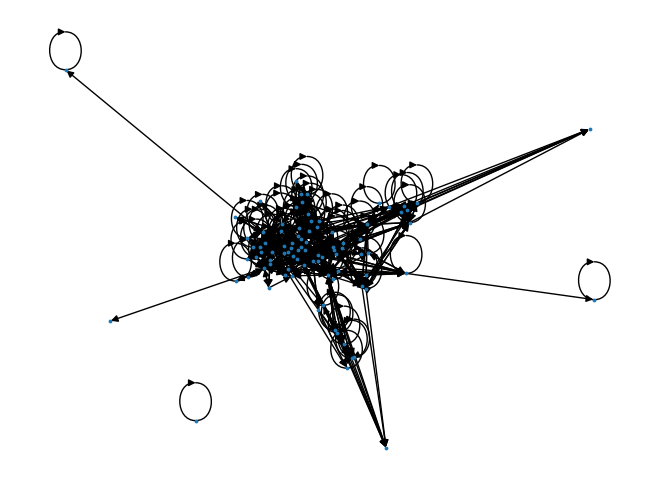

In [118]:
nx.draw_spring(g.subgraph(selected_nodes_pr),node_size=3)

In [201]:
# 步骤3：文本关键词提取算法RAKE
'''
RAKE的算法就是把文本的句子进行分词，然后取一个滑窗从头到尾扫文本，在滑窗里的分词就要和中心词进行add edge操作，然后创建一个出一张图
利用图中每个节点(分词)的degree/节点在文章中出现的次数得到这个节点的RAKE值
'''
import jieba
from collections import Counter
# text = '''
# 一纸四季报，令芯片巨头英特尔一夜间股价重挫近6.5%，市值蒸发80亿美元，再度被AMD反超。

# 这份严重缩水的财报显示，英特尔在去年四季度营收大降32%至140亿美元，是2016年以来最低单季收入；净利润由三季度的10.2亿美元转为近7亿美元净亏损；毛利率更从2021年四季度的53.6%大幅下降至39.2%。

# 此番业绩“跳水”并非英特尔一家的一时失利，在全球PC出货量整体下滑的背景下，包括英特尔、AMD、英伟达、高通在内的芯片企业，均在过去一年里出现不同程度的收入与利润下滑，但英特尔的确是其中的重灾区。
# '''
# text = '''
# 2021年，成都地区生产总值已经超过1.99万亿元，距离2万亿门槛仅咫尺之间。在去年遭受多轮疫情冲击及高温限电冲击的不利影响下，2022年，成都市实现地区生产总值20817.5亿元，按可比价格计算，比上年增长2.8%。

# 成都因此成为第7个跨过GDP2万亿门槛的城市。目前，GDP万亿城市俱乐部中形成了4万亿、3万亿、2万亿和万亿这四个梯队。上海和北京在2021年跨过了4万亿，深圳2021年跨过了3万亿，重庆、广州、苏州和成都则是2万亿梯队。

# 在排名前十的城市中，预计武汉将超过杭州。武汉市政府工作报告称，预计2022年武汉地区生产总值达到1.9万亿元左右。而杭州市统计局公布的数据显示，杭州2022年地区生产总值为18753亿元。受疫情影响，武汉在2020年GDP排名退居杭州之后。
# '''
text = '''
据报道，美国证券交易委员会（SEC）与特斯拉首席执行官埃隆·马斯克之间又起波澜。SEC正对马斯克展开调查，主要审查内容是，马斯克是否参与了关于特斯拉自动驾驶软件的不恰当宣传。

据知情人士透露，该机构正在调查马斯克是否就驾驶辅助技术发表了不恰当的前瞻声明。

特斯拉在2014年首次发布了其自动驾驶辅助功能，公司声称该功能可以让汽车在车道内自动转向、加速和刹车。目前所有特斯拉车辆都内置了该软件。
'''
text = text.replace("\n","")

In [202]:
words = jieba.lcut(text)
words = [x for x in words if len(x) > 1]

In [191]:
g_rake = nx.Graph()
for i in range(len(words)-2):
    for j in range(i-2,i+2):
        if i == j:
            continue
        g_rake.add_edge(words[i],words[j])

In [179]:
g_rake_degree = dict(g_rake.degree())

In [180]:
word_counts = dict(Counter(words))

In [181]:
g_rake_degree_df = pd.DataFrame.from_dict(g_rake_degree,orient="index")

In [182]:
word_counts_df = pd.DataFrame.from_dict(word_counts,orient="index")

In [183]:
g_rake_degree_df["word_feq"] = g_rake_degree_df.index.map(word_counts)

In [184]:
g_rake_degree_df.columns = ['degree','word_feq']

In [185]:
g_rake_degree_df['score'] = g_rake_degree_df['degree'] / g_rake_degree_df['word_feq']

In [162]:
#text1
g_rake_degree_df.sort_values(by="score",ascending=False)[:10]

,degree,word_feq,score
一纸,4,1,4.0
此番,4,1,4.0
失利,4,1,4.0
一时,4,1,4.0
一家,4,1,4.0
并非,4,1,4.0
跳水,4,1,4.0
业绩,4,1,4.0
39.2%,4,1,4.0
净利润,4,1,4.0


In [175]:
#text2
g_rake_degree_df.sort_values(by="score",ascending=False)[:10]

,degree,word_feq,score
成为,4,1,4.0
统计局,4,1,4.0
工作,4,1,4.0
计算,4,1,4.0
上年,4,1,4.0
增长,4,1,4.0
2.8%,4,1,4.0
成都,8,2,4.0
因此,4,1,4.0
杭州市,4,1,4.0


In [186]:
#text3
g_rake_degree_df.sort_values(by="score",ascending=False)[:10]

,degree,word_feq,score
报道,4,1,4.0
2014,4,1,4.0
知情,4,1,4.0
人士,4,1,4.0
透露,4,1,4.0
机构,4,1,4.0
正在,4,1,4.0
技术,4,1,4.0
发表,4,1,4.0
前瞻,4,1,4.0


In [203]:
# 步骤4：文本关键词提取算法TextRank
g_pr = nx.Graph()
for i in range(len(words)-2):
    for j in range(i-2,i+2):
        if i == j:
            continue
        g_pr.add_edge(words[i],words[j])

In [204]:
g_pr_degree_df = pd.DataFrame.from_dict(nx.pagerank(g_pr),orient="index")
g_pr_degree_df.columns = ['pr_scores']

In [195]:
#text1
g_pr_degree_df.sort_values(by="pr_scores",ascending=False)[:10]

,pr_scores
英特尔,0.052188
亿美元,0.038941
芯片,0.024184
收入,0.023290
四季度,0.023267
下滑,0.023035
AMD,0.022597
一纸,0.014703
四季,0.014053
39.2%,0.013422


In [200]:
#text2
g_pr_degree_df.sort_values(by="pr_scores",ascending=False)[:10]

,pr_scores
万亿,0.049486
生产总值,0.030740
2022,0.025951
武汉,0.024953
杭州,0.024408
城市,0.023795
2021,0.022903
地区,0.021436
成都,0.021024
万亿元,0.020630


In [205]:
#text3
g_pr_degree_df.sort_values(by="pr_scores",ascending=False)[:10]

,pr_scores
特斯拉,0.052274
马斯克,0.047339
自动,0.038326
驾驶,0.033599
SEC,0.029068
恰当,0.028882
调查,0.025348
辅助,0.024999
是否,0.024196
功能,0.023132
